### **KDD (Group 6)**
Team Members:


*   Eswar Chand Vuppala
*   Phiny Francis Govathoti
*   Pooja Reddy Kadari
*   Vedant Patel

[Click here for Github Link](https://github.com/pooja0207k/KDD-Project-Group-6.git)

## **Project Title: Predictive Modeling of Health Risks Associated with Mobile Phone Usage**

<p align="justify">This project is centered about discovering how mobile phones may damage our health. As phones become an increasingly significant part of our daily lives, it is critical to grasp any possible concerns they may present. We are developing a model to anticipate these hazards based on factors such as Headache, Anxiety or Stress and other health concerns associated with phone use. Essentially, we're leveraging data to discover how using our phones affects our well-being and provide advise on how to keep healthy while being connected.</p>


### Import Libraries and Connect to Google Drive

To install the PyCaret library, we can use the following pip command:

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 825.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

Here are the Python imports used for data processing, visualization, and machine learning:

In [ ]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from pycaret.classification import *

To access files stored in your Google Drive, we can use the following code to mount your Google Drive:

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


To change the current working directory to a specific folder in our Google Drive, we use the `%cd` command:

In [ ]:
# Change the working directory to a folder in Google Drive
%cd '/content/gdrive/My Drive/Group_6_Project'

/content/gdrive/My Drive/Group_6_Project


To list files in the current directory, we use the `os` module:

In [ ]:
import os

# List files in the current directory
os.listdir()


['data', 'logs.log']

### Import Dataset

To import a CSV file into a Pandas DataFrame, we use the `pd.read_csv()` function:



In [ ]:
# Import CSV file into a DataFrame
df = pd.read_csv('./data/Impact_of_Mobile_Phone_on_Students_Health.csv')

### Analyzing the Dataset

To display the contents of a DataFrame and generate summary statistics, we use the `display()` function and the `describe()` method in Pandas:

In [ ]:
# Display the entire DataFrame
display(df)

# Print summary statistics
print(df.describe())

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Agree,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Neutral,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Strongly agree,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,Strongly agree,During Class Lectures,No,Internet Access,Only Partially,Reasarch,NaN,Never,Limiting Screen Time,Excellent
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,Agree,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Zahoor,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,> 6 hours,Agree,During Exams,Yes,Internet Access,Yes,Reasarch,Headache,Sometimes,Taking Break during prolonged use,Excellent
96,Hafeez,16-20,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Strongly agree,During Class Lectures,No,Notes Taking App,No,Reasarch,Anxiety or Stress,Sometimes,Taking Break during prolonged use,Good
97,Babar,16-20,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,2-4 hours,Agree,While Studying,No,Internet Access,No,Reasarch,Headache,Never,Limiting Screen Time,Excellent
98,Rizwan,16-20,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Agree,During Exams,No,Internet Access,Yes,Reasarch,Headache,Rarely,Limiting Screen Time,Excellent;Good


        Names    Age Gender  Mobile Phone  Mobile Operating System   \
count     100    100     100           100                      100   
unique    100      4       2             1                        2   
top     Lubna  21-25    Male           Yes                  Android   
freq        1     72      81           100                       81   

       Mobile phone use for education Mobile phone activities  \
count                              98                      99   
unique                              4                       7   
top                         Sometimes            All of these   
freq                               53                      59   

       Helpful for studying    Educational Apps Daily usages  \
count                    98                  98           99   
unique                    2                   4            4   
top                     Yes  Educational Videos    4-6 hours   
freq                     94                  54           40  

### Visualizing daily usage hours, and mobile phone activites

To visualize the distribution of daily mobile phone usage hours and the frequency of different mobile phone activities, you can use the `matplotlib` and `seaborn` libraries:

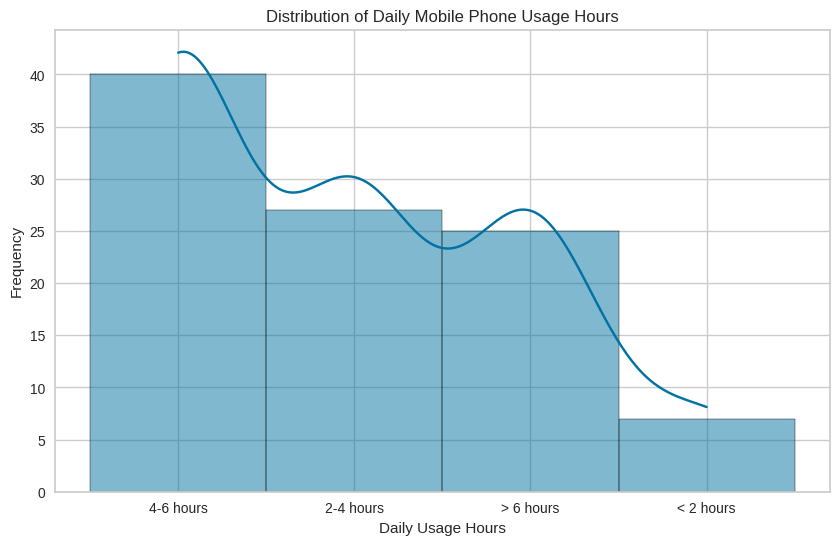

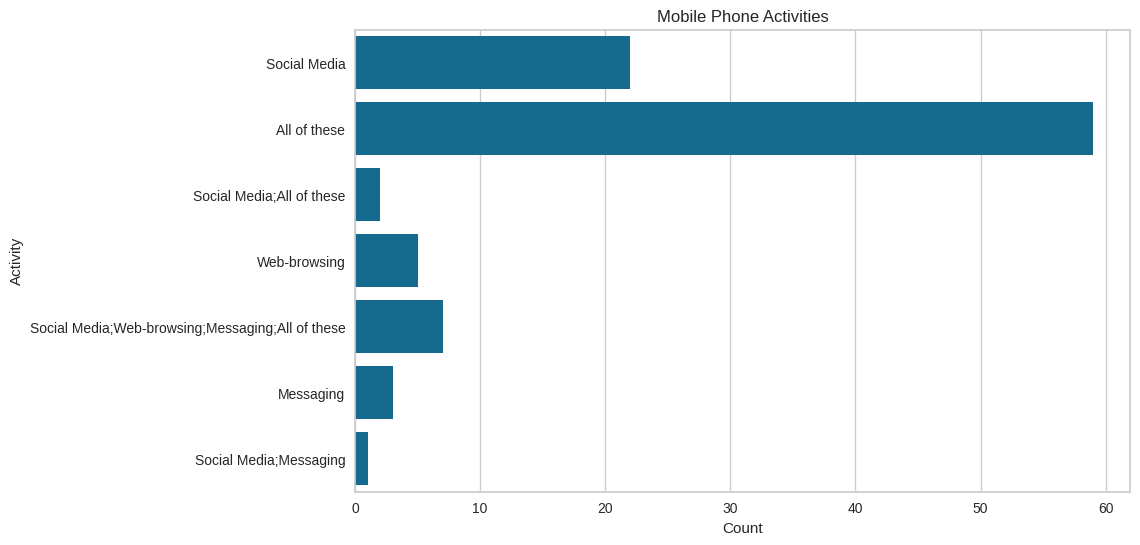

In [ ]:
# Distribution of daily usage hours
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily usages'], bins=10, kde=True)
plt.title('Distribution of Daily Mobile Phone Usage Hours')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Frequency')
plt.show()

# Mobile phone activities
plt.figure(figsize=(10, 6))
sns.countplot(y='Mobile phone activities', data=df)
plt.title('Mobile Phone Activities')
plt.xlabel('Count')
plt.ylabel('Activity')
plt.show()

When working with data in pandas, it's common to encounter column names with unwanted leading or trailing spaces. This can lead to issues when referencing columns for analysis or manipulation. To clean up these column names, we use the following approach:

In [ ]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

### Preprocessing the Data

To select specific columns from our DataFrame, we use the following code:



In [ ]:
# Columns to keep in the dataset
columns_to_keep = ['Health Risks', 'Mobile Phone',
                   'Age', 'Daily usages', 'Health rating']
df = df[columns_to_keep]

In [ ]:
df.head()

,Health Risks,Mobile Phone,Age,Daily usages,Health rating
0,Yes,Yes,21-25,4-6 hours,Excellent
1,Yes,Yes,21-25,4-6 hours,Good
2,Yes,Yes,21-25,4-6 hours,Excellent
3,Only Partially,Yes,21-25,2-4 hours,Excellent
4,No,Yes,21-25,> 6 hours,Excellent


To convert categorical age ranges into numerical values representing the midpoints of those ranges, we use the following approach:

In [ ]:
# Convert age ranges to numerical values (midpoints)
def age_to_midpoint(age_range):
    if age_range == '16-20':
        return 18
    elif age_range == '21-25':
        return 23
    elif age_range == '26-30':
        return 28
    elif age_range == '31-35':
        return 33
    else:
        return None

df['Age'] = df['Age'].apply(age_to_midpoint)

### Encoding Categorical Variables

In [ ]:
# Encoding 'Health Risks' column
df['Health Risks'] = df['Health Risks'].map({'No': 0, 'Only Partially': 1, 'Yes': 1})

# Encoding 'Mobile Phone' column
df['Mobile Phone'] = df['Mobile Phone'].map({'No': 0, 'Yes': 1})

### Converting 'Daily Usages' to Numerical Values

In [ ]:
# Convert 'Daily usage' to numerical values
def daily_usage_to_num(daily_usage):
    if daily_usage == '< 2 hours':
        return 1
    elif daily_usage == '2-4 hours':
        return 2
    elif daily_usage == '4-6 hours':
        return 3
    elif daily_usage == '> 6 hours':
        return 4
    else:
        return None

df['Daily usages'] = df['Daily usages'].apply(daily_usage_to_num)

### Converting 'Health Rating' to Numerical Values

In [ ]:
# Function to convert 'Health rating' to numerical values
def health_rating_to_num(health_rating):
    ratings = {'Poor': 0, 'Excellent;Good;Fair;Poor': 2, 'Fair': 3, 'Good;Fair': 4, 'Good': 5, 'Excellent;Good': 6, 'Excellent': 7}
    return ratings.get(health_rating, None)

df['Health rating'] = df['Health rating'].apply(health_rating_to_num)

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,Health Risks,Mobile Phone,Age,Daily usages,Health rating
0,1.0,1,23,3.0,7.0
1,1.0,1,23,3.0,5.0
2,1.0,1,23,3.0,7.0
3,1.0,1,23,2.0,7.0
4,0.0,1,23,4.0,7.0


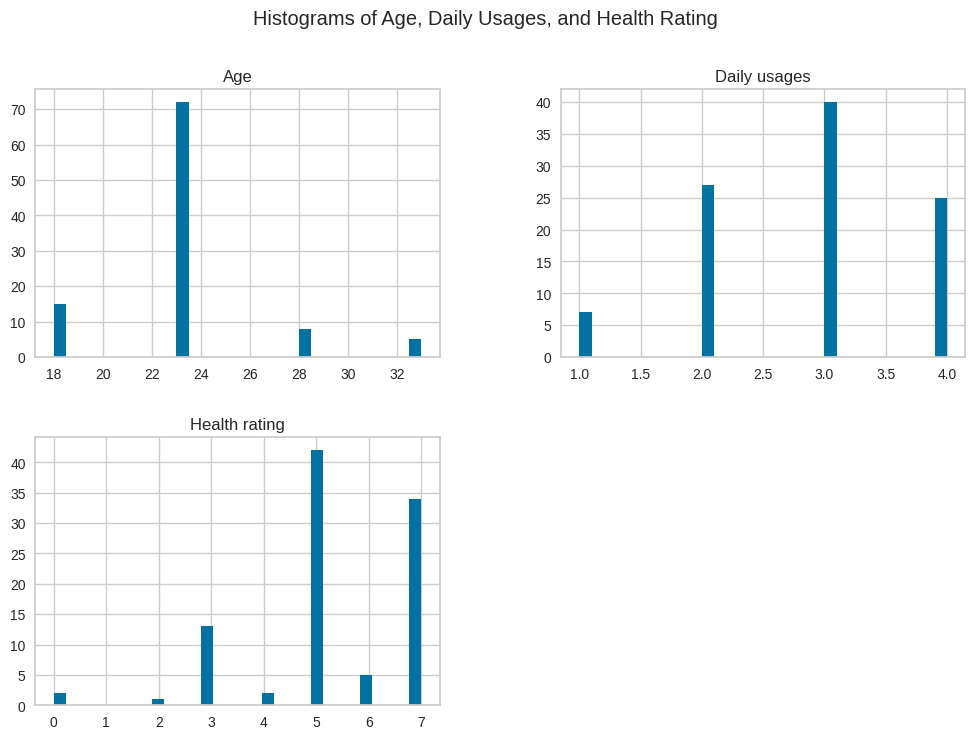

In [ ]:
# Plot histograms for numerical columns
df[['Age', 'Daily usages', 'Health rating']].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Age, Daily Usages, and Health Rating')
plt.show()

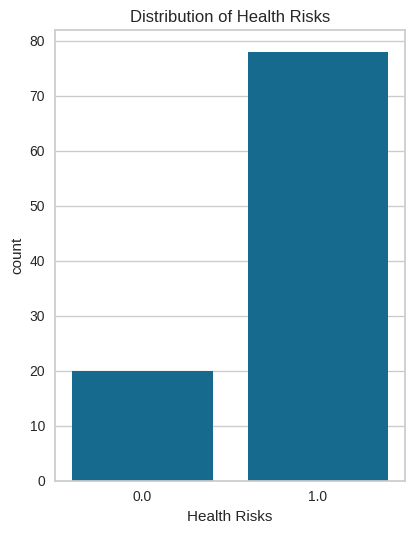

In [ ]:
# Plot bar plot for 'Health Risks' and 'Mobile Phone'

# Health Risks
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Health Risks')
plt.title('Distribution of Health Risks')

plt.tight_layout()
plt.show()


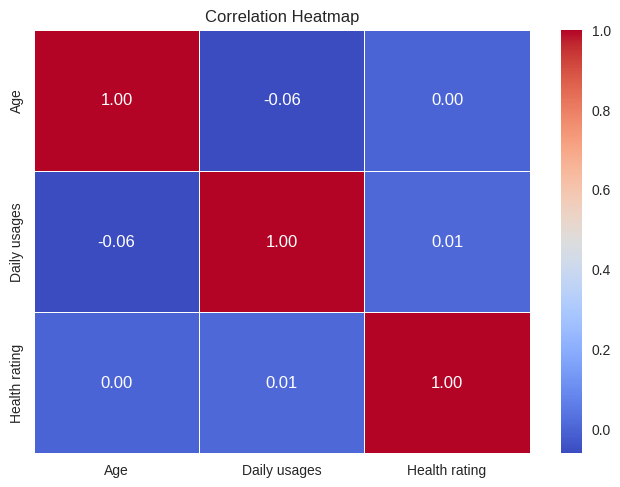

In [ ]:
# Compute the correlation matrix
corr_matrix = df[['Age', 'Daily usages', 'Health rating']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Checking for Missing Columns

In [ ]:
# Check if any column is missing after selection and conversion
if any(col not in df for col in columns_to_keep):
    print(f"Missing columns after selection: {', '.join(col for col in columns_to_keep if col not in df)}")

To maintain the quality of dataset and ensure that all rows contain complete data, we need to remove rows with missing values:

In [ ]:
# Drop rows with missing values
df = df.dropna()

To identify the extent of missing data in our DataFrame, we calculate the number of missing values for each row. This helps in understanding where the data gaps are and deciding how to handle them.

In [ ]:
# Calculate number of missing values in each row
df.isna().sum()

,0
Health Risks,0
Mobile Phone,0
Age,0
Daily usages,0
Health rating,0


It's essential to separate dataset into features (input variables) and the target variable (output variable) that we want to predict:

In [ ]:
# Define features (X) and target variable (y)
X = df.drop('Health Risks', axis=1)
y = df['Health Risks']

### Splitting the Data into Training and Testing Sets:

To evaluate the performance of a machine learning model, it's essential to split dataset into training and testing subsets. This ensures that the model is trained on one part of the data and tested on a completely separate part, providing an unbiased evaluation of its performance.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Importing and Using `MinMaxScaler` for Feature Scaling

Feature scaling is a critical step in preprocessing data for machine learning models. The `MinMaxScaler` transforms features by scaling them to a specified range, typically between 0 and 1. This helps ensure that all features contribute equally to the model.

In [ ]:
# Import MinMaxScaler and scale features
from sklearn.preprocessing import MinMaxScaler


# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Rescale features using MinMaxScaler
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

### Data Preparation

### Modeling

### Instantiating and Fitting a Logistic Regression Classifier

In [ ]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit the Logistic Regression model to the training data
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

### Evaluating the Logistic Regression Model

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Predict instances from the test set
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of the logistic regression model
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logistic regression model
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  0.75


array([[ 0,  5],
       [ 0, 15]])

### Logistic Regression Score

### Generating and Printing the Classification Report

In [ ]:
# print classification report
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



### Pycaret Score

### Using PyCaret for Model Comparison, Tuning, and Evaluation


In [ ]:
# Set up the PyCaret environment
clf1 = setup(data=df, target = 'Health Risks')

# compare models
best = compare_models()

# Tune the best model
tuned_model = tune_model(best)

# Evaluate the model
evaluate_model(tuned_model)

,Description,Value
0,Session id,1761
1,Target,Health Risks
2,Target type,Binary
3,Original data shape,"(98, 5)"
4,Transformed data shape,"(98, 5)"
5,Transformed train set shape,"(68, 5)"
6,Transformed test set shape,"(30, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8095,0.5233,0.9800,0.8157,0.8886,0.0888,0.0945,0.2920
gbc,Gradient Boosting Classifier,0.8095,0.4633,0.9800,0.8157,0.8886,0.0888,0.0945,0.1000
ridge,Ridge Classifier,0.7952,0.3617,1.0000,0.7952,0.8844,0.0000,0.0000,0.0370
lr,Logistic Regression,0.7952,0.3350,1.0000,0.7952,0.8844,0.0000,0.0000,0.4540
lda,Linear Discriminant Analysis,0.7952,0.3733,1.0000,0.7952,0.8844,0.0000,0.0000,0.0250
lightgbm,Light Gradient Boosting Machine,0.7952,0.3450,1.0000,0.7952,0.8844,0.0000,0.0000,0.4740
dummy,Dummy Classifier,0.7952,0.5000,1.0000,0.7952,0.8844,0.0000,0.0000,0.0240
dt,Decision Tree Classifier,0.7929,0.5700,0.9233,0.8329,0.8731,0.1822,0.1879,0.0250
nb,Naive Bayes,0.7667,0.4817,0.9467,0.8024,0.8634,0.0186,0.0221,0.0310
et,Extra Trees Classifier,0.7643,0.5733,0.9400,0.7957,0.8595,-0.0135,-0.0158,0.1390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8000,1.0000,0.8333,0.9091,0.5882,0.6455
1,0.7143,0.6500,1.0000,0.7143,0.8333,0.0000,0.0000
2,0.8571,0.7500,1.0000,0.8333,0.9091,0.5882,0.6455
3,0.7143,0.8500,1.0000,0.7143,0.8333,0.0000,0.0000
4,0.8571,0.3333,1.0000,0.8571,0.9231,0.0000,0.0000
5,0.7143,0.0000,0.8333,0.8333,0.8333,-0.1667,-0.1667
6,0.8571,1.0000,1.0000,0.8571,0.9231,0.0000,0.0000
7,0.8571,0.2500,1.0000,0.8571,0.9231,0.0000,0.0000
8,0.8333,0.0000,1.0000,0.8333,0.9091,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Hyperparameter Tuning with GridSearchCV

Hyperparameter tuning is a crucial step in optimizing the performance of machine learning models. GridSearchCV from scikit-learn allows for an exhaustive search over a specified parameter grid to find the best combination of hyperparameters for a given mode

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameter values to search
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.795789 using {'max_iter': 100, 'tol': 0.01}


### Decision Tree Score

### Instantiating and Fitting a Decision Tree Classifier

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTree classifier with default parameter values
dtree=DecisionTreeClassifier()

# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

#print creation message
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


### Predicting and Evaluating Model Performance

In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)

# print classification report
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.72      0.87      0.79        15

    accuracy                           0.65        20
   macro avg       0.36      0.43      0.39        20
weighted avg       0.54      0.65      0.59        20



### Random Forest Score

### Instantiating and Fitting a Random Forest Classifier

In [ ]:
# Instantiate a Random Forest Classifier with default parameter values
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20,
                                       n_estimators=100, oob_score=True)

# Defining the random forest classifier
classifier_rf.fit(X_train,y_train)

#print creation message
print('Random Forest Classifier Created')

Random Forest Classifier Created


### Predicting and Evaluating Model Performance with Random Forest

In [ ]:
# Predicting the values of test data
y_pred = classifier_rf.predict(X_test)

# print classification report
print("Random Forest Classification report - \n", classification_report(y_test,y_pred))

Random Forest Classification report - 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.74      0.93      0.82        15

    accuracy                           0.70        20
   macro avg       0.37      0.47      0.41        20
weighted avg       0.55      0.70      0.62        20



In [ ]:
# Get the accuracy score of Random Forest model and print it
print("Accuracy of Random Forest classifier: ", classifier_rf.score(X_test,y_test))

# Print the confusion matrix of the Random Forest model
confusion_matrix(y_test,y_pred)

Accuracy of Random Forest classifier:  0.7


array([[ 0,  5],
       [ 1, 14]])

### Comparing Multiple Classifiers

In [ ]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier(),
    GaussianNB()
    ]

top_class = []

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])

    # training model
    pipe.fit(X_train, y_train)
    print(classifier)

    acc_score = pipe.score(X_test, y_test)
    print("model score: %.3f" % acc_score)

    # using the model to predict
    y_pred = pipe.predict(X_test)

    # target_names = [le_name_mapping[x] for x in le_name_mapping]
    print(classification_report(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model score: 0.750
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20

SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model score: 0.750
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.75      1.00      0.86        15

    accuracy                     

### Conclusion/Results:

* Logistic Regression Score: 75%
* Pycaret Score: 79.52%
* Decision Tree Score: 65%
* Random Forest Score: 70%
* KNN Score: 75%


### Key Findings
#### Best Performers:
K-Nearest Neighbors (KNN), Logistic Regression Score, and AdaBoost Classifier all achieved the highest accuracy of 75%. These models also showed good performance in the classification reports with high precision and recall for class 1.0.

#### Consistent Performers:
Random Forest, Gradient Boosting, and Gaussian Naive Bayes achieved an accuracy of 0.700. These models showed consistent performance with high recall for the positive class but struggled with precision and recall for the negative class (0.0).

#### Underperformer:
SGD Classifier performed poorly with an accuracy of 0.250 and failed to effectively predict the positive class (1.0). It misclassified all instances of this class, indicating it may not be suitable for this dataset.

#### Known Issues:
Class imbalance is a concern, as the models showed low precision and recall for the negative class (`0.0`), which skews performance metrics and makes models seem more effective than they are.
Model bias towards the positive class (`1.0`) further exacerbates this issue. Relying solely on accuracy can be misleading, necessitating a focus on precision, recall, and F1-score for a comprehensive evaluation.
Additionally, inadequate feature engineering and insufficient hyperparameter tuning may limit model performance, highlighting the need for techniques such as resampling and fine-tuning to enhance accuracy and generalization.